# Monte Carlo Simulation

### What is Monte Carlo Simulation?

Monte Carlo Simulation is a computational method that uses repeated random sampling to simulate and model the behavior of complex systems or processes.

### Three examples to demonstrate the MC method

- Estimate Pi using MC simulation
- Load and capacity risk analysis 
- Construction project Budget vs Cost Risk Analysis 

In [1]:
__author__ = "Bing Huang"
__email__ = "Binghuang1990@gmail.com"

## Example 1: Estimate Pi using MC simulation

**Uniform Distribution:**

The Random Variable (random points in this case) follows the uniform distribution, as the occurances of all random points within the range are equally likely.

Total number of points inside the circle:  767
Total number of points inside the square:  1000
Approximation of pi:  3.068
Error:  0.07359265358979306


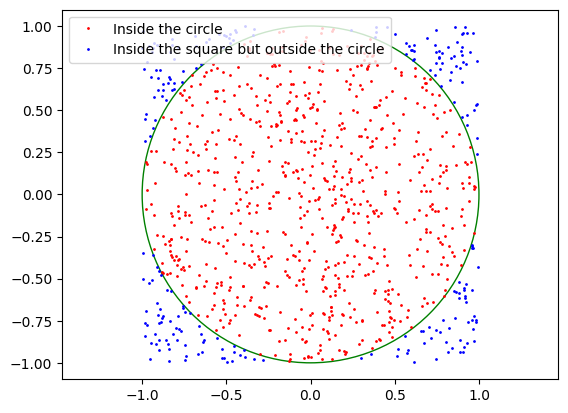

In [2]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt

# Number of iterations (random ponits) to generate
n = 1000

# Initial counter of points inside the unit circle and inside unit square
count_inside_circle = 0
count_inside_square = 0

# Create lists to store x and y inside the circle
x_inside_circle = []
y_inside_circle = []

# Create lists to store x and y inside the square but outside the circle
x_inside_square = []
y_inside_square = []

# Loop to generate random points
for i in range(n):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    
    if x**2 + y**2 <= 1:
        count_inside_circle += 1
        x_inside_circle.append(x)
        y_inside_circle.append(y)
    else:
        x_inside_square.append(x)
        y_inside_square.append(y)
    count_inside_square += 1  

# Calculate the value of pi
pi_approx = 4 * count_inside_circle / count_inside_square

print("Total number of points inside the circle: ", count_inside_circle)
print("Total number of points inside the square: ", count_inside_square)
print("Approximation of pi: ", pi_approx)
print("Error: ", np.abs(np.pi - pi_approx))

# Plot the points
plt.plot(x_inside_circle, y_inside_circle, 'ro', markersize= 1, label='Inside the circle')
plt.plot(x_inside_square, y_inside_square, 'bo', markersize= 1, label='Inside the square but outside the circle')

#Create axis with equal aspect ratio in both axis
ax = plt.gca()
ax.set_aspect('equal', 'box')

#Set axis limits
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))

#Add a circle
circle_plot = plt.Circle( (0, 0), 1, color='green', linewidth=1.0, fill=False)
ax.add_artist(circle_plot)
plt.legend()
plt.axis('equal')
plt.show()

## Example 2: Load and Capacity Analysis

Introduction: The concept of load and capacity analysis originates from the need to design and evaluate engineering systems that can safely support applied loads without failure. hese projects are fundamental in structural, mechanical, and civil engineering to ensure safety, reliability, and cost-effectiveness.

**Normal Distribution:**

The normal distribution is widely used in engineering risk analysis because it effectively represents many natural and man-made processes due to the Central Limit Theorem (CLT). 


Estimated probability of failure: 0.195


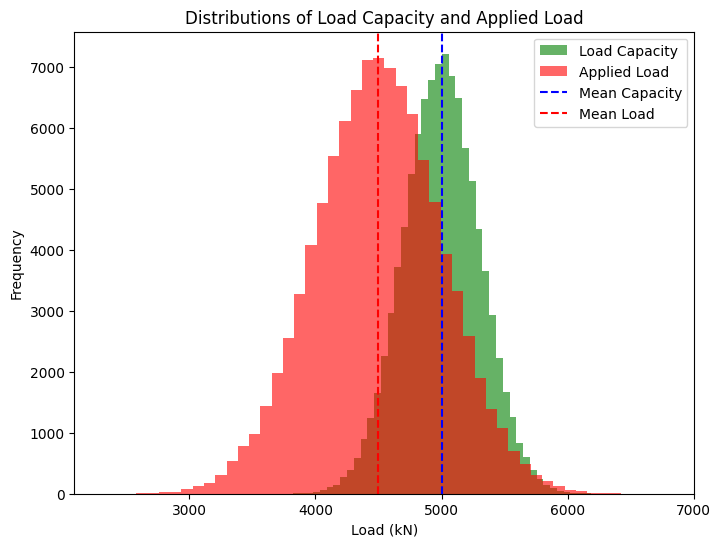

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Number of iterations
num_simulations = 100000

# Define distributions of random variables
# Normal distribution
mean_capacity = 5000  # Mean load capacity in kN
std_capacity = 300     # Standard deviation of load capacity

mean_load = 4500       # applied load
std_load = 500         

# MC simulation
np.random.seed(42)  # For reproducibility
capacities = np.random.normal(mean_capacity, std_capacity, num_simulations)
loads = np.random.normal(mean_load, std_load, num_simulations)

# Determine failures
failures = loads > capacities  # Boolean array where failure condition is met

# Calculate risk
failure_probability = np.sum(failures) / num_simulations

print(f"Estimated probability of failure: {failure_probability:.3f}")

# Plot histograms
plt.figure(figsize=(8, 6))
plt.hist(capacities, bins=50, alpha=0.6, color='green', label='Load Capacity')
plt.hist(loads, bins=50, alpha=0.6, color='red', label='Applied Load')
plt.axvline(mean_capacity, color='blue', linestyle='--', label='Mean Capacity')
plt.axvline(mean_load, color='red', linestyle='--', label='Mean Load')
plt.title('Distributions of Load Capacity and Applied Load')
plt.xlabel('Load (kN)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Example 3: Monte Carlo Simulation for risk analysis

Introduction:

This project uses Monte Carlo Simulation (MCS) to perform a risk analysis for a construction project. The goal is to estimate the likelihood that the total project cost will exceed a predefined budget of $1,000,000, considering uncertainties in material, labor, and equipment costs.

Each cost component is modeled using probabilistic distributions to reflect real-world variability:

- Material Costs: Normally distributed ($500,000 ± $50,000).
- Labor Costs: Normally distributed ($400,000 ± $60,000).
- Equipment Costs: Uniformly distributed ($80,000–$120,000).

Estimated Probability of Exceeding Budget: 49.85%
Mean Total Cost: $999,770.25


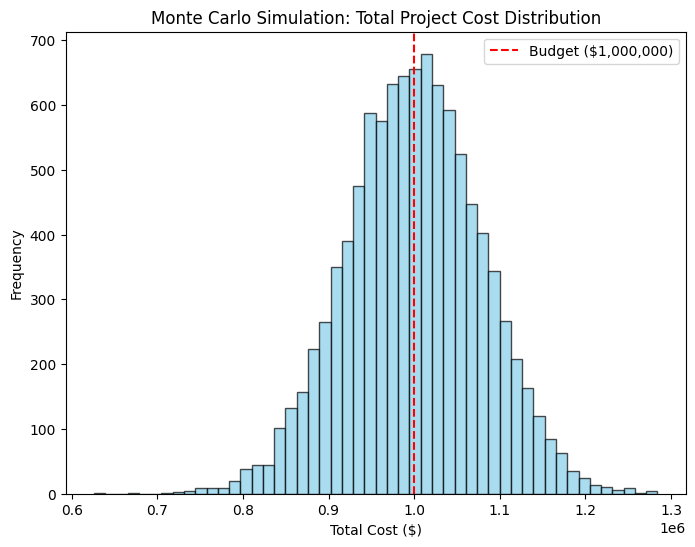

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Number of MC simulations
num_simulations = 10000  

# Cost distributions
mean_material_cost = 500000
std_material_cost = 50000
mean_labor_cost = 400000
std_labor_cost = 60000
equipment_cost_min = 80000
equipment_cost_max = 120000

# Monte Carlo Simulation
total_costs = []
for _ in range(num_simulations):
    # Sample random values for each cost component
    material_cost = np.random.normal(mean_material_cost, std_material_cost)
    labor_cost = np.random.normal(mean_labor_cost, std_labor_cost)
    equipment_cost = np.random.uniform(equipment_cost_min, equipment_cost_max)
    
    # Calculate total cost
    total_cost = material_cost + labor_cost + equipment_cost
    total_costs.append(total_cost)

# Analyze results
total_costs = np.array(total_costs)
probability_over_budget = np.mean(total_costs > 1000000)  # Probability of exceeding budget

print(f"Estimated Probability of Exceeding Budget: {probability_over_budget:.2%}")
print(f"Mean Total Cost: ${np.mean(total_costs):,.2f}")

# plot
plt.figure(figsize=(8, 6))
plt.hist(total_costs, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(1000000, color='red', linestyle='--', label='Budget ($1,000,000)')
plt.title('Monte Carlo Simulation: Total Project Cost Distribution')
plt.xlabel('Total Cost ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()